In [80]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio 
import webbrowser
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import os

from datetime import datetime
import pytz
#Load the dataset
data= pd.read_csv('heart-disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [24]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df=pd.read_csv('Global EV Data 2024.csv')
print(df.isnull().sum())

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [28]:
data['chol']=data['chol'].replace(np.nan,data['chol'].mean())

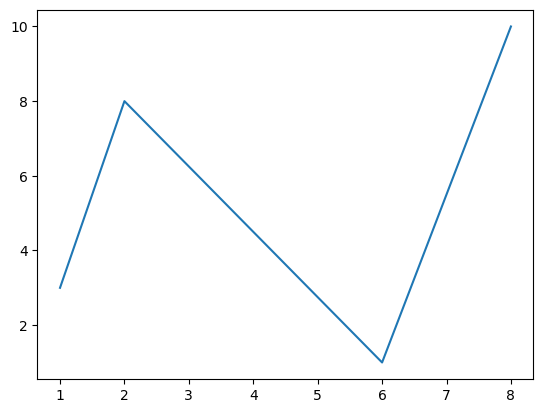

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


xpoints=np.array([1,2,6,8])
ypoints=np.array([3,8,1,10])

plt.plot(xpoints,ypoints)
plt.show()


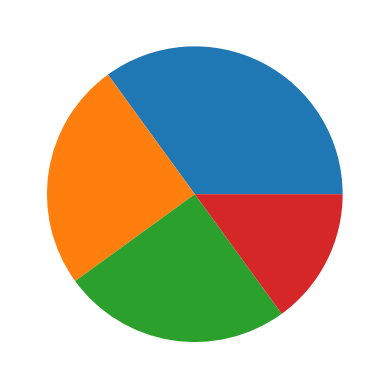

In [30]:
y=np.array([35,25,25,15])

plt.pie(y)
plt.show()


In [31]:
x = np.random.normal(170,10,250)
print(x)


[172.8207163  161.07153064 156.97701359 165.15919384 187.73389963
 161.06558076 152.73582256 141.60240653 189.22569475 165.10460963
 183.74386782 165.97355837 177.06041621 168.90408759 173.16401146
 170.32000212 162.6589384  168.96149012 167.18060766 157.58623387
 154.91555163 161.19554125 160.61934905 166.68405374 168.85804927
 152.68433159 164.30249889 155.55835233 178.6843088  175.82487653
 153.1713663  173.70633329 174.57016897 174.91584525 165.8639867
 172.18419629 175.38962571 177.19555893 157.74108329 190.18774274
 176.80586374 171.51666563 192.71293103 183.1934309  170.01871248
 174.18114949 166.43007482 187.67391059 155.2625945  164.40288604
 146.60323301 177.96183125 152.78237173 177.667913   159.01338854
 145.62364374 169.15616706 186.23488725 164.87126031 191.63487861
 158.60030781 180.69148162 173.32210475 151.22676124 175.75113902
 179.99808971 175.17933849 158.1467799  170.21956253 169.07528638
 158.6747023  168.0817051  173.75063546 176.86284962 184.8336536
 164.4005584

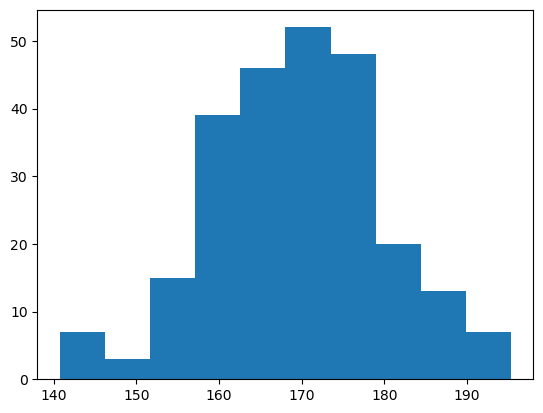

In [32]:
plt.hist(x)
plt.show()

C:\Users\phars\AppData\Local\Temp\ipykernel_8092\230963844.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\phars\OneDrive\Documents\anaconda_files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



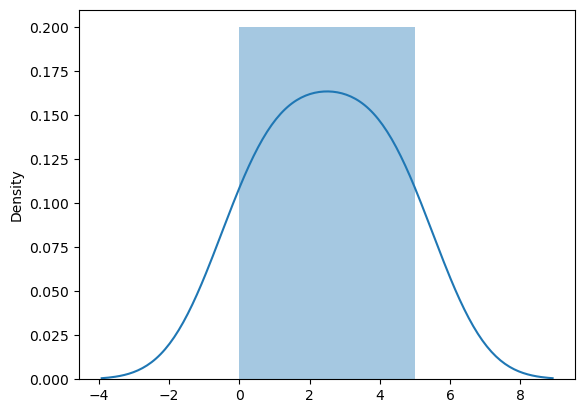

In [33]:
sns.distplot([0,1,2,3,4,5])
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\phars\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


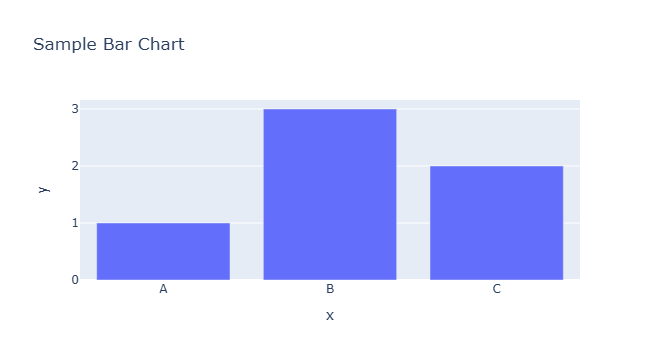

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import nltk
import plotly.express as px

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
nltk.download('vader_lexicon')

fig=px.bar(x=["A","B","C"],y=[1,3,2],title="Sample Bar Chart")
fig.show()

In [35]:
fig.write_html("interactive_plot.html")


In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\phars\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
# Step 1: Load the Dataset
apps_df = pd.read_csv('Play Store Data.csv')
reviews_df = pd.read_csv('User Reviews.csv')

In [38]:
# Step 2: Data Cleaning
apps_df = apps_df.dropna(subset=['Rating'])
for column in apps_df.columns:
    apps_df[column].fillna(apps_df[column].mode()[0], inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df = apps_df[apps_df['Rating'] <= 5]
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

In [39]:
# Merge datasets on 'App' and handle non-matching apps
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')

In [40]:
# Step 3: Data Transformation
apps_df['Reviews'] = apps_df['Reviews'].astype(int)
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

In [41]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

In [42]:
apps_df['Size'] = apps_df['Size'].apply(convert_size)

In [43]:
# Add log_installs and log_reviews columns
apps_df['Log_Installs'] = np.log1p(apps_df['Installs'])
apps_df['Log_Reviews'] = np.log1p(apps_df['Reviews'])

In [44]:
# Add Rating Group column
def rating_group(rating):
    if rating >= 4:
        return 'Top rated'
    elif rating >= 3:
        return 'Above average'
    elif rating >= 2:
        return 'Average'
    else:
        return 'Below average'

apps_df['Rating_Group'] = apps_df['Rating'].apply(rating_group)

In [45]:
# Add Revenue column
apps_df['Revenue'] = apps_df['Price'] * apps_df['Installs']

In [46]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
reviews_df['Sentiment_Score'] = reviews_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [47]:
review = "This app is amazing! I love the new features."
sentiment_score= sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [48]:
review = "This app is very bad! I hate the new features."
sentiment_score= sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.8427}


In [49]:
review = "This app is okay."
sentiment_score= sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.2263}


In [50]:
reviews_df['Sentiment_Score']=reviews_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [51]:
# Extract year from 'Last Updated' and create 'Year' column
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')
apps_df['Year'] = apps_df['Last Updated'].dt.year

C:\Users\phars\OneDrive\Documents\anaconda_files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\phars\OneDrive\Documents\anaconda_files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\phars\OneDrive\Documents\anaconda_files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



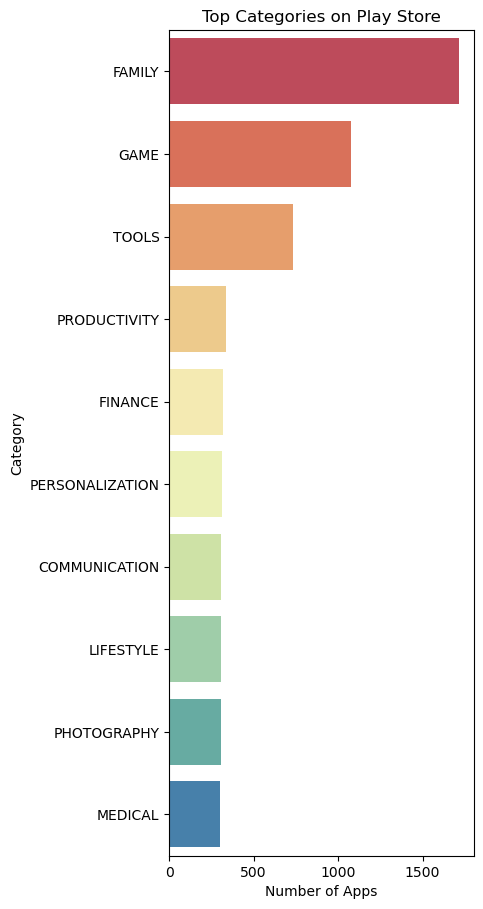

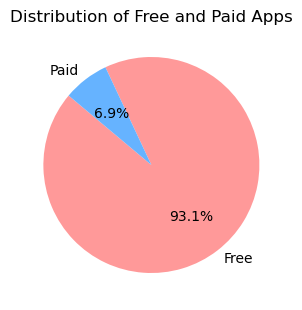

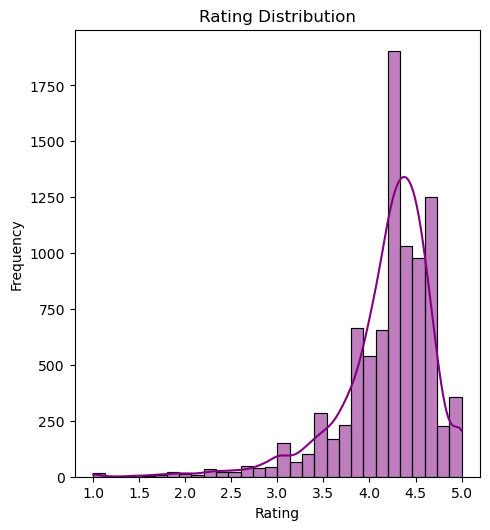

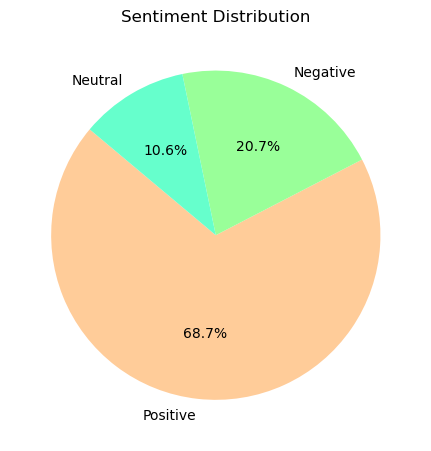

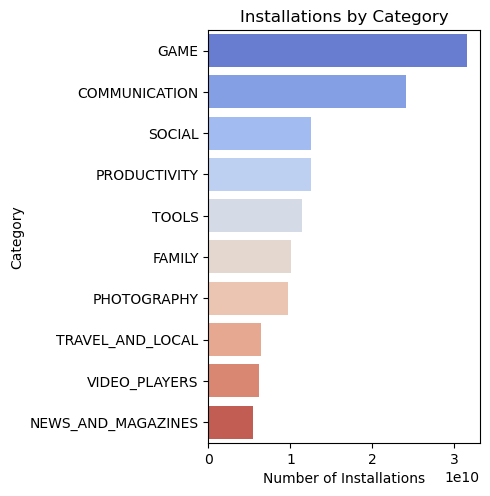

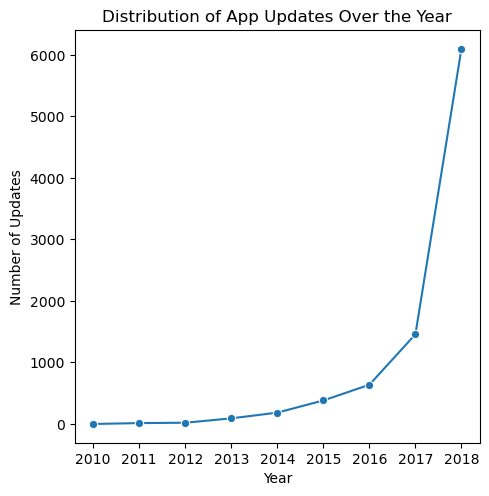

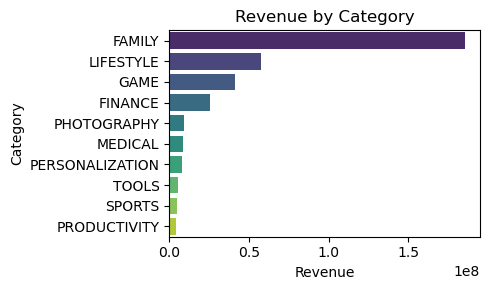

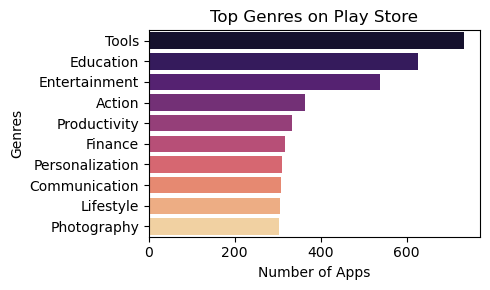

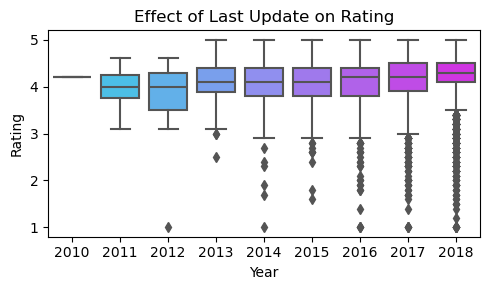

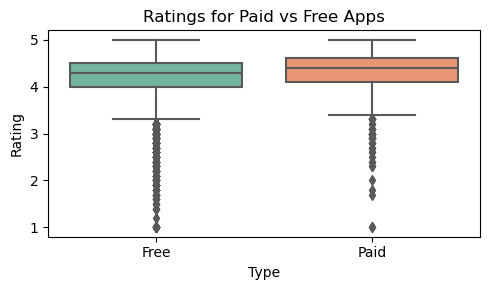

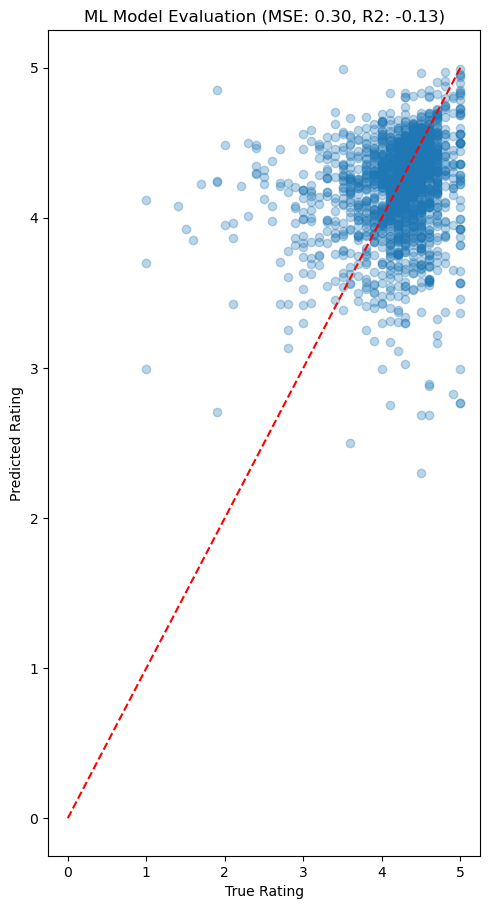

In [52]:
# Create Tkinter window
class AppDashboard(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Google Play Store Analysis Dashboard")
        self.geometry("1200x800")
        self.configure(bg='lightgray')

        # Create a main canvas and scrollbars
        main_frame = tk.Frame(self)
        main_frame.pack(fill=tk.BOTH, expand=True)

        canvas = tk.Canvas(main_frame, bg='lightgray')
        v_scrollbar = ttk.Scrollbar(main_frame, orient="vertical", command=canvas.yview)
        h_scrollbar = ttk.Scrollbar(main_frame, orient="horizontal", command=canvas.xview)
        
        v_scrollbar.pack(side="right", fill="y")
        h_scrollbar.pack(side="bottom", fill="x")
        canvas.pack(side="left", fill="both", expand=True)
        
        scrollable_frame = ttk.Frame(canvas)
        
        scrollable_frame.bind(
            "<Configure>",
            lambda e: canvas.configure(
                scrollregion=canvas.bbox("all")
            )
        )

        canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
        canvas.configure(yscrollcommand=v_scrollbar.set, xscrollcommand=h_scrollbar.set)

        # Create a grid layout for the dashboard
        for i in range(6):
            scrollable_frame.columnconfigure(i, weight=1)

        # Create and place frames for each visualization
        self.create_category_analysis(scrollable_frame, 0, 0)
        self.create_type_analysis(scrollable_frame, 0, 1)
        self.create_rating_sentiment_analysis(scrollable_frame, 0, 2)
        self.create_installation_update_analysis(scrollable_frame, 0, 3)
        self.create_additional_insights(scrollable_frame, 0, 4)
        self.create_ml_model_evaluation(scrollable_frame, 0, 5)

    def create_category_analysis(self, parent, row, column):
        frame = ttk.Frame(parent, padding="5")
        frame.grid(row=row, column=column, sticky="nsew", pady=5)
        frame.columnconfigure(0, weight=1)

        category_counts = apps_df['Category'].value_counts().nlargest(10)
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x=category_counts.values, y=category_counts.index, palette='Spectral', ax=ax)
        ax.set_title('Top Categories on Play Store')
        ax.set_xlabel('Number of Apps')
        ax.set_ylabel('Category')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

    def create_type_analysis(self, parent, row, column):
        frame = ttk.Frame(parent, padding="5")
        frame.grid(row=row, column=column, sticky="nsew", pady=5)
        frame.columnconfigure(0, weight=1)

        type_counts = apps_df['Type'].value_counts()
        fig, ax = plt.subplots(figsize=(3, 2))
        ax.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
        ax.set_title('Distribution of Free and Paid Apps')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

    def create_rating_sentiment_analysis(self, parent, row, column):
        frame = ttk.Frame(parent, padding="5")
        frame.grid(row=row, column=column, sticky="nsew", pady=5)
        frame.columnconfigure(0, weight=1)

        fig, ax = plt.subplots(figsize=(5, 3))
        sns.histplot(apps_df['Rating'], bins=30, kde=True, color='purple', ax=ax)
        ax.set_title('Rating Distribution')
        ax.set_xlabel('Rating')
        ax.set_ylabel('Frequency')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

        sentiment_counts = reviews_df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')).value_counts()
        fig, ax = plt.subplots(figsize=(3, 2))
        ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ffcc99', '#99ff99', '#66ffcc'])
        ax.set_title('Sentiment Distribution')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

    def create_installation_update_analysis(self, parent, row, column):
        frame = ttk.Frame(parent, padding="5")
        frame.grid(row=row, column=column, sticky="nsew", pady=5)
        frame.columnconfigure(0, weight=1)

        installs_by_category = apps_df.groupby('Category')['Installs'].sum().nlargest(10)
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x=installs_by_category.values, y=installs_by_category.index, palette='coolwarm', ax=ax)
        ax.set_title('Installations by Category')
        ax.set_xlabel('Number of Installations')
        ax.set_ylabel('Category')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

        updates_over_year = apps_df['Year'].value_counts().sort_index()
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.lineplot(x=updates_over_year.index, y=updates_over_year.values, marker='o', ax=ax)
        ax.set_title('Distribution of App Updates Over the Year')
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Updates')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

    def create_additional_insights(self, parent, row, column):
        frame = ttk.Frame(parent, padding="5")
        frame.grid(row=row, column=column, sticky="nsew", pady=5)
        frame.columnconfigure(0, weight=1)

        revenue_by_category = apps_df.groupby('Category')['Revenue'].sum().nlargest(10)
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette='viridis', ax=ax)
        ax.set_title('Revenue by Category')
        ax.set_xlabel('Revenue')
        ax.set_ylabel('Category')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

        genres_counts = apps_df['Genres'].str.split(';').explode().value_counts().nlargest(10)
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x=genres_counts.values, y=genres_counts.index, palette='magma', ax=ax)
        ax.set_title('Top Genres on Play Store')
        ax.set_xlabel('Number of Apps')
        ax.set_ylabel('Genres')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

        fig, ax = plt.subplots(figsize=(5, 3))
        sns.boxplot(data=apps_df, x='Year', y='Rating', palette='cool', ax=ax)
        ax.set_title('Effect of Last Update on Rating')
        ax.set_xlabel('Year')
        ax.set_ylabel('Rating')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

        fig, ax = plt.subplots(figsize=(5, 3))
        sns.boxplot(data=apps_df, x='Type', y='Rating', palette='Set2', ax=ax)
        ax.set_title('Ratings for Paid vs Free Apps')
        ax.set_xlabel('Type')
        ax.set_ylabel('Rating')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

    def create_ml_model_evaluation(self, parent, row, column):
        frame = ttk.Frame(parent, padding="5")
        frame.grid(row=row, column=column, sticky="nsew", pady=5)
        frame.columnconfigure(0, weight=1)

        X = apps_df[['Log_Reviews', 'Log_Installs', 'Price']]
        y = apps_df['Rating']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        fig, ax = plt.subplots(figsize=(5, 3))
        ax.scatter(y_test, y_pred, alpha=0.3)
        ax.plot([0, 5], [0, 5], 'r--')
        ax.set_title(f'ML Model Evaluation (MSE: {mse:.2f}, R2: {r2:.2f})')
        ax.set_xlabel('True Rating')
        ax.set_ylabel('Predicted Rating')
        fig.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().pack(expand=True, fill="both")

if __name__ == "__main__":
    app = AppDashboard()
    app.mainloop()

In [55]:
html_files_path="./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)
plot_containers=""

In [56]:
# Save each Plotly figure to an HTML file
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    # Append the plot and its insight to plot_containers
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

In [57]:
plot_width=400
plot_height=300
plot_bg_color='black'
text_color='white'
title_font={'size':16}
axis_font={'size':12}

In [61]:
#Figure 1
category_counts=apps_df['Category'].value_counts().nlargest(10)
fig1=px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x':'Category','y':'Count'},
    title='Top Categories on Play Store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
)
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig1,"Category Graph 1.html","The top categories on the Play Store are dominated by tools, entertainment, and productivity apps")
            

In [62]:
#Figure 2
type_counts=apps_df['Type'].value_counts()
fig2=px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=400,
    height=300
)
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig2,"Type Graph 2.html","Most apps on the Playstore are free, indicating a strategy to attract users first and monetize through ads or in app purchases")

In [63]:
#Figure 3
fig3=px.histogram(
    apps_df,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],
    width=400,
    height=300
)
fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig3,"Rating Graph 3.html","Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users")

In [64]:
#Figure 4
sentiment_counts=reviews_df['Sentiment_Score'].value_counts()
fig4=px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x':'Sentiment Score','y':'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,
    width=400,
    height=300
)
fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig4,"Sentiment Graph 4.html","Sentiments in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments")

In [65]:
#Figure 5
installs_by_category=apps_df.groupby('Category')['Installs'].sum().nlargest(10)
fig5=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation='h',
    labels={'x':'Installs','y':'Category'},
    title='Installs by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=400,
    height=300
)
fig5.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig5,"Installs Graph 5.html","The categories with the most installs are social and communication apps, reflecting their broad appeal and daily usage")

In [66]:
# Updates Per Year Plot
updates_per_year = apps_df['Last Updated'].dt.year.value_counts().sort_index()
fig6 = px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Updates'},
    title='Number of Updates Over the Years',
    color_discrete_sequence=['#AB63FA'],
    width=plot_width,
    height=plot_height
)
fig6.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig6, "Updates Graph 6.html", "Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps.")

In [67]:
#Figure 7
revenue_by_category=apps_df.groupby('Category')['Revenue'].sum().nlargest(10)
fig7=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    labels={'x':'Category','y':'Revenue'},
    title='Revenue by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=400,
    height=300
)
fig7.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig7,"Revenue Graph 7.html","Categories such as Business and Productivity lead in revenue generation, indicating their monetization potential")

In [68]:
#Figure 8
genre_counts=apps_df['Genres'].str.split(';',expand=True).stack().value_counts().nlargest(10)
fig8=px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels={'x':'Genre','y':'Count'},
    title='Top Genres',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=400,
    height=300
)
fig8.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig8,"Genre Graph 8.html","Action and Casual genres are the most common, reflecting users' preference for engaging and easy-to-play games")

In [69]:
#Figure 9
fig9=px.scatter(
    apps_df,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of Last Update on Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=400,
    height=300
)
fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig9,"Update Graph 9.html","The Scatter Plot shows a weak correlation between the last update and ratings, suggesting that more frequent updates dont always result in better ratings.")

C:\Users\phars\OneDrive\Documents\anaconda_files\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [70]:
#Figure 10
fig10=px.box(
    apps_df,
    x='Type',
    y='Rating',
    color='Type',
    title='Rating for Paid vs Free Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=400,
    height=300
)
fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig10,"Paid Free Graph 10.html","Paid apps generally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for")

In [71]:
plot_containers_split=plot_containers.split('</div>')

In [72]:
if len(plot_containers_split) > 1:
    final_plot=plot_containers_split[-2]+'</div>'
else:
    final_plot=plot_containers

In [73]:
dashboard_html= """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name=viewport" content="width=device-width,initial-scale-1.0">
    <title> Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """


In [74]:
final_html=dashboard_html.format(plots=plot_containers,plot_width=plot_width,plot_height=plot_height)

In [75]:
dashboard_path=os.path.join(html_files_path,"web page.html")

In [76]:
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_html)

In [77]:
webbrowser.open('file://'+os.path.realpath(dashboard_path))

True

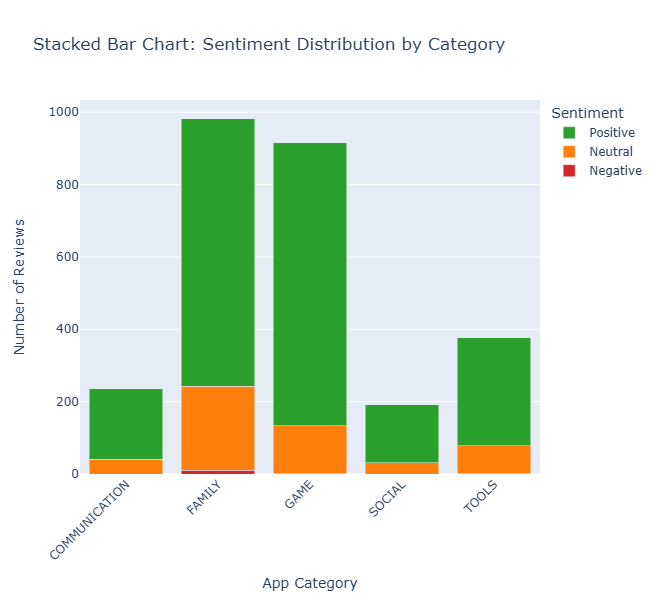

In [79]:
#ASSIGNMENT TASK 1 

import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Play Store Data.csv')

def convert_shorthand(x):
    if isinstance(x, str):
        x = x.upper().strip()
        if 'M' in x:
            return float(x.replace('M', '')) * 1000000
        elif 'K' in x:
            return float(x.replace('K', '')) * 1000
        elif 'B' in x:
            return float(x.replace('B', '')) * 1000000000
        else:
            return float(x)
    return x

df['Reviews']= df['Reviews'].apply(convert_shorthand).astype(int)

fil_df = df[df['Reviews'] > 1000]

top5_categories = fil_df.groupby('Category')['Reviews'].sum().nlargest(5).index
fil_df = fil_df[fil_df['Category'].isin(top5_categories)]

def get_sentiment(rating):
    if rating >= 4.1:
        return 'Positive'
    elif rating >= 3.0:
        return 'Neutral'
    else:
        return 'Negative'

fil_df['Sentiment'] = fil_df['Rating'].apply(get_sentiment)

def group_rating(r):
    if r <= 2.0:
        return '1-2 stars'
    elif r <= 4.0:
        return '3-4 stars'
    else:
        return '4-5 stars'

fil_df['Rating Group'] = fil_df['Rating'].apply(group_rating)

import plotly.graph_objects as go
import pandas as pd

grouped = fil_df.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')

pivot_df = grouped.pivot_table(index='Category', columns='Sentiment', values='Count', fill_value=0).reset_index()

for sentiment in ['Negative', 'Neutral', 'Positive']:
    if sentiment not in pivot_df.columns:
        pivot_df[sentiment] = 0

# Create the figure
fig = go.Figure()

# Add traces for each sentiment
fig.add_trace(go.Bar(
    x=pivot_df['Category'],
    y=pivot_df['Negative'],
    name='Negative',
    marker_color='#d62728'
))

fig.add_trace(go.Bar(
    x=pivot_df['Category'],
    y=pivot_df['Neutral'],
    name='Neutral',
    marker_color='#ff7f0e'
))

fig.add_trace(go.Bar(
    x=pivot_df['Category'],
    y=pivot_df['Positive'],
    name='Positive',
    marker_color='#2ca02c'
))

# Update layout for stacked bars
fig.update_layout(
    barmode='stack',
    title='Stacked Bar Chart: Sentiment Distribution by Category',
    xaxis_title='App Category',
    yaxis_title='Number of Reviews',
    xaxis_tickangle=-45,
    legend_title='Sentiment',
    height=600,
    width=1000
)

fig.show()


In [81]:
#ASSIGNMENT TASK 2 


df = pd.read_csv("Play Store Data.csv")

# Drop rows with missing essential values
df = df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs', 'Last Updated'])

# Filter by rating ≥ 4.0
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df[df['Rating'] >= 4.0]

def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '').strip())
    elif 'k' in size:
        return float(size.replace('k', '').strip()) / 1024
    elif size == 'Varies with device':
        return np.nan
    return np.nan

df['Size_MB'] = df['Size'].apply(convert_size)
df = df[df['Size_MB'] >= 10]

df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df = df[df['Last Updated'].dt.month == 1]

df['Installs'] = df['Installs'].astype(str).str.extract('(\d+)')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df = df.dropna(subset=['Installs'])  # Remove rows where conversion failed
df['Installs'] = df['Installs'].astype(int)

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

top_categories = df.groupby('Category')['Installs'].sum().nlargest(10).index
df_top = df[df['Category'].isin(top_categories)]

summary = df_top.groupby('Category').agg({
    'Rating': 'mean',
    'Reviews': 'sum'
}).reset_index()

In [84]:
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
if 15 <= current_time.hour < 17:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    bar_width = 0.35
    index = np.arange(len(summary))

    # Bar for total reviews (primary y-axis)
    bars1 = ax1.bar(index, summary['Reviews'], bar_width, label='Total Reviews', color='green')
    ax1.set_ylabel('Total Reviews', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Bar for average rating (secondary y-axis)
    ax2 = ax1.twinx()
    bars2 = ax2.bar(index + bar_width, summary['Rating'], bar_width, label='Average Rating', color='blue')
    ax2.set_ylabel('Average Rating', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.set_ylim(0, 5)  # Ratings are on a scale of 0 to 5

    # X-axis setup
    ax1.set_xlabel('App Category')
    ax1.set_title('Top 10 App Categories by Installs (Filtered)')
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(summary['Category'], rotation=45)

    # Combine legends
    bars = bars1 + bars2
    labels = [bar.get_label() for bar in bars]
    ax1.legend()

    plt.tight_layout()
    plt.show()
else:
    print(f"⛔ Graph not shown: Current IST time is {current_time.strftime('%H:%M')}.\n""This visualization is only available between 15:00 and 17:00 IST.")

⛔ Graph not shown: Current IST time is 10:34.
This visualization is only available between 15:00 and 17:00 IST.


In [85]:
#ASSIGNMENT TASK 3 


data = pd.read_csv('Play Store Data.csv')

data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True)

data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

data = data.dropna(subset=['Installs'])

data['Installs'] = data['Installs'].astype(int)

data = data[~data['Category'].str.startswith(('A', 'C', 'G', 'S'))]


category_installs = data.groupby('Category')['Installs'].sum().reset_index()

top5_categories = category_installs.nlargest(5, 'Installs')['Category']

filtered_data = data[data['Category'].isin(top5_categories)]

country_installs = filtered_data.groupby([ 'Category'])['Installs'].sum().reset_index()

country_installs['Highlight'] = country_installs['Installs'] > 1_000_000

In [88]:
ist = pytz.timezone('Asia/Kolkata')
current_time_ist = datetime.now(ist).time()

if current_time_ist >= datetime.strptime('18:00', '%H:%M').time() and current_time_ist <= datetime.strptime('20:00', '%H:%M').time():
    fig = px.choropleth(
        country_installs,
        # locations="Country",
        locationmode="country names",
        color="Installs",
        # hover_name="Country",
        hover_data={"Category": True, "Installs": True, "Highlight": True},
        animation_frame="Category",
        color_continuous_scale="Blues",
        title="Global Installs by App Category (Filtered Top 5)"
    )

    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
        title_x=0.5
    )

    fig.show()
else:
    print("Choropleth map will be visible only between 6 PM and 8 PM IST.")

Choropleth map will be visible only between 6 PM and 8 PM IST.


In [90]:
# ASSIGNMENT TASK 4 


df = pd.read_csv("Play Store Data.csv") 

def size_to_mb(size):
    if pd.isna(size) or size == 'Varies with device':
        return None
    size = size.replace('M', '').replace('k', '')
    try:
        if 'M' in size:
            return float(size)
        elif 'k' in size:
            return float(size) / 1024
        else:
            return float(size)
    except:
        return None

df['Size_MB'] = df['Size'].replace('Varies with device', None)
df['Size_MB'] = df['Size_MB'].str.replace('M', '').str.replace('k', '')
df['Size_MB'] = pd.to_numeric(df['Size_MB'], errors='coerce')

df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

categories = ['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']
df_filtered = df[
    (df['Rating'] > 3.5) &
    (df['Category'].isin(categories)) &
    (df['Reviews'] > 500) &
    (~df['App'].str.contains('s', case=False)) &
    (df['Installs'] > 50000)
]
category_translation = {
    'BEAUTY': 'सौंदर्य',
    'BUSINESS': 'வணிகம்',
    'DATING': 'Verabredung'
}
df_filtered['Category'] = df_filtered['Category'].replace(category_translation)

                    

C:\Users\phars\AppData\Local\Temp\ipykernel_8092\4018996118.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
if 17 <= now_ist.hour < 19:
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")

    # Assign color pink to Game
    colors = df_filtered['Category'].apply(lambda x: 'pink' if x == 'GAME' else 'blue')

    bubble = plt.scatter(
        df_filtered['Size_MB'], df_filtered['Rating'],
        s=df_filtered['Installs'] / 1000,  # bubble size
        alpha=0.6, c=colors
    )

    plt.title("App Size vs Rating (Bubble Size = Installs)")
    plt.xlabel("App Size (MB)")
    plt.ylabel("Average Rating")
    plt.grid(True)
    plt.show()
else:
    print("This chart is available only between 5 PM and 7 PM IST.")

This chart is available only between 5 PM and 7 PM IST.


In [94]:
# ASSIGNMENT TASK 5 


df = pd.read_csv("Play Store Data.csv")

def parse_reviews(value):
    if isinstance(value, str):
        value = value.strip()
        if 'M' in value:
            return int(float(value.replace('M', '')) * 1_000_000)
        elif 'K' in value:
            return int(float(value.replace('K', '')) * 1_000)
        elif value.isnumeric():
            return int(value)
    return np.nan

df['Parsed_Reviews'] = df['Reviews'].apply(parse_reviews)

df_filtered = df[
    (~df['App'].str.lower().str.startswith(('x', 'y', 'z'))) &
    (~df['App'].str.lower().str.contains('s')) &
    (df['Category'].str.startswith(('E', 'C', 'B'))) &
    (df['Parsed_Reviews'] > 500)
].copy()

df_filtered['Installs'] = df_filtered['Installs'].str.replace('[+,]', '', regex=True)
df_filtered = df_filtered[df_filtered['Installs'].str.isnumeric()]
df_filtered['Installs'] = df_filtered['Installs'].astype(int)

df_filtered['Last Updated'] = pd.to_datetime(df_filtered['Last Updated'], errors='coerce')
df_filtered['Month'] = df_filtered['Last Updated'].dt.to_period('M')
translation = {
    'Beauty': 'सौंदर्य',        # Hindi
    'Business': 'வணிகம்',      # Tamil
    'Dating': 'Partnersuche'   # German
}
df_filtered['Category'] = df_filtered['Category'].replace(translation)

grouped = df_filtered.groupby(['Month', 'Category'])['Installs'].sum().reset_index()
grouped['Month'] = grouped['Month'].dt.to_timestamp()
grouped['Pct_Change'] = grouped.groupby('Category')['Installs'].pct_change()

now_utc = datetime.utcnow().replace(tzinfo=pytz.utc)
now_ist = now_utc.astimezone(pytz.timezone('Asia/Kolkata'))

In [97]:
if 18 <= now_ist.hour < 21:
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))

    for cat in grouped['Category'].unique():
        cat_data = grouped[grouped['Category'] == cat]
        plt.plot(cat_data['Month'], cat_data['Installs'], label=cat)

        growth = cat_data[cat_data['Pct_Change'] > 0.2]
        plt.fill_between(growth['Month'], 0, growth['Installs'], alpha=0.3)

    plt.title("Monthly Install Trends by Category (20%+ Growth Highlighted)")
    plt.xlabel("Month")
    plt.ylabel("Total Installs")
    plt.xticks(rotation=45)
    plt.legend(title="App Category")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
else:
    print("This graph is only visible between 6 PM and 9 PM IST.")

This graph is only visible between 6 PM and 9 PM IST.
